# Planteamiento del modelo

<br>

<div align="justify">
    El planteamiento del modelo matemático requiere de un proceso de análisis de las variables de estudio (¿qué variables presentan una mayor influencia?). Para ello, empezamos por importar los datos del problema experimental, luego realizamos un estudio estadístico mediante una gráfica de distribución normal y diagrama de pareto; y, finalmente, planteamos <i>TODOS</i> los posibles modelos y escogemos los 5 que mejor se adaptan al fenómeno.
</div>

In [1]:
%store -r Datos

## Estabilidad

<br>

<div align="justify">
    En primer lugar, es importante determinar la estabilidad del experimento. 
</div>

In [2]:
from App.Pretratamiento.Estabilidad import Est
Estabilidad = Est(Datos)

Estabilidad()

ADVERTENCIA: El coeficiente de variación (CV) está por encima del 10%


{'Promedio': 2.9356,
 'Desvest': 0.33532587135501485,
 'CV [%]': 11.422737135679755,
 'Varianza': 0.11244343999999995}

<div align = "justify">
En caso de que existan datos por fuera, o por dentro, de la superficie del cubo experimental, se realiza la partición de datos para "Planteamiento" y "Validación".
</div>

<br>

<div align = "justify">
    Los datos para el <strong>plantemiento</strong> de los modelos matemáticos corresponden a los que se encuentran en la superficie del cubo (filas compuestas <i>únicamente</i> por: -1, 0 o 1); mientras que los datos de <strong>validación</strong> corresponden a los demás.
</div>

<br>

De maner resumida:

$$
\begin{equation}
  Plant=\left\{
    \begin{array}{@{} l c @{}}
      1 & \text{Nivel superior} \\
      0 & \text{Centro del cubo}\\
      -1 & \text{Nivel inferior}
    \end{array}\right.
\end{equation}
$$

$$
\begin{equation}
    Val = \forall x \left( x \in \mathbb{R} \, \Lambda \, x \neq  -1 , x \neq 0 , x \neq 1 \right) \, x \in fila_{datos}
\end{equation}
$$

Para este caso particular...

In [3]:
Data_Plant = Estabilidad.Plant
Data_Val = Estabilidad.Val

%store Data_Val

print(Data_Val)

Stored 'Data_Val' (dict)
{'A': [0.0, 0.0, 0.0, 0.0, 2.0, -2.0, 0.0, 0.0, 1.5, -1.5, 0.0, 0.0], 'B': [0.0, 0.0, 2.0, -2.0, 0.0, 0.0, 1.5, -1.5, 0.0, 0.0, 0.0, 0.0], 'C': [2.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5, -1.5], 'Y': [5.777, 0.832, 3.267, 2.705, 14.853, 9.35, 3.129, 2.973, 8.642, 6.511, 4.689, 1.418]}


## Análisis de la varianza

<br>

<div align="justify">
    A continuación, se puede apreciar la variación entre los datos experimentales a partir de una gráfica de distribución normal y un diagrama de pareto.
</div>

<IPython.core.display.Javascript object>


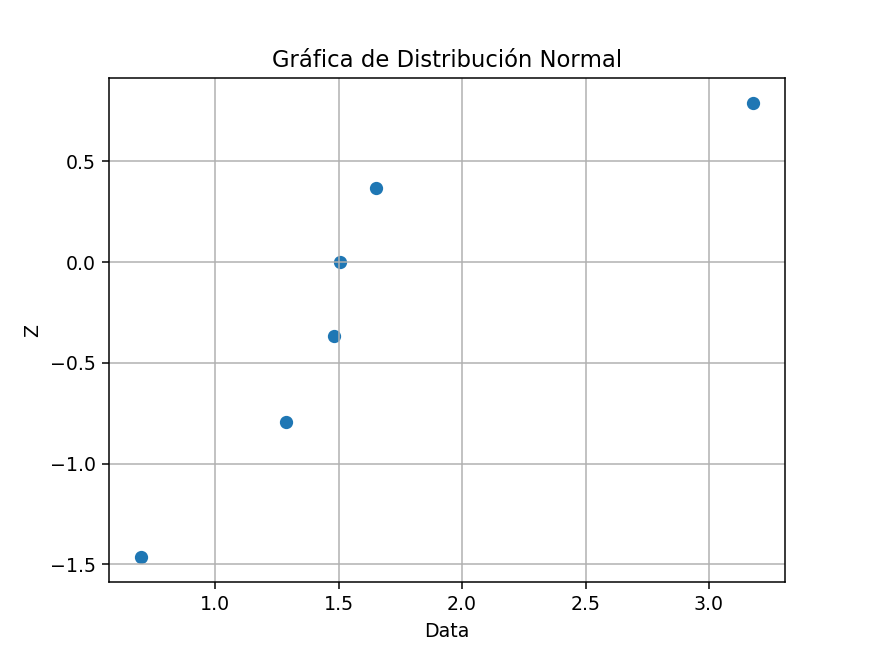

In [4]:
%matplotlib notebook
from App.Pretratamiento.ANOVA import NormalGraph, Pareto
NormDist = NormalGraph(Data_Plant)()

<IPython.core.display.Javascript object>


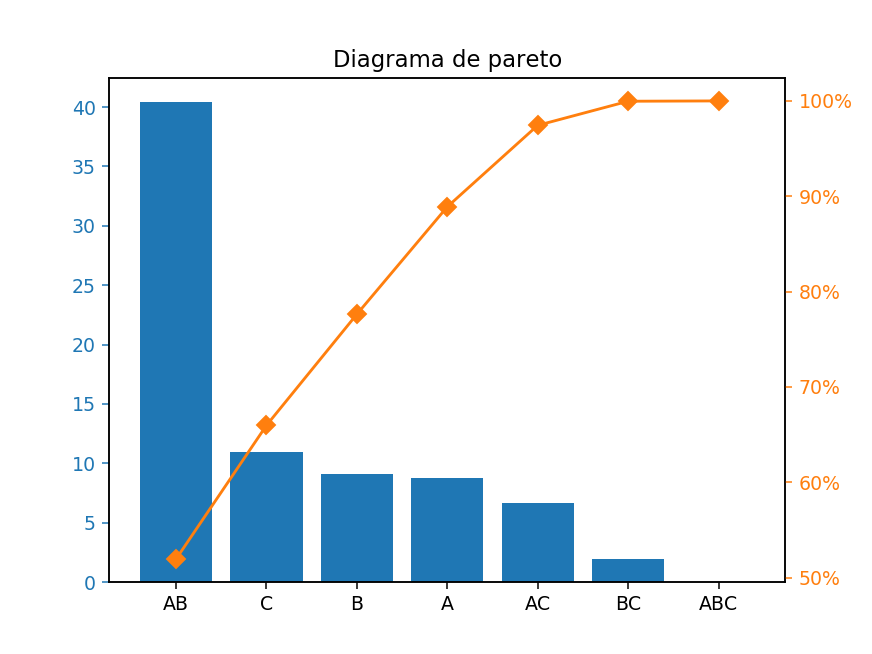

In [6]:
%matplotlib notebook
Pareto(Data_Plant, grid=True)

## Modelos Matemáticos

<br>

<div align="justify">
    El análisis de la varianza nos ayuda a entender cuáles son las variables con mayor efecto dentro del fenómeno experimental estudiado. Cuando el análisis es manual, permite identificar un punto de partida para el inicio del proceso iterativo. Sin embargo, gracias a la tecnología, es posible evaluar cientos (y puede que miles) de modelos matemáticos en cuestión de segundos!
</div>

<br>

<div align="justify">
    Pero antes de pensar en plantear múltiples modelos de manera simultánea, concentrémonos en plantear el primero. 
</div>

### Planteamiento

<br> 

<div align="justify">
    El modelo matemático general planteado es del orden:
</div>

$$
\begin{equation}
    Y = b X
    \label{General}
    \tag{1}
\end{equation}
$$

Donde $Y$ corresponde a la respuesta, $b$ a las constantes y $X$ a las variables.

Durante la práctica experimental, obtuvimos diversas variables de respuesta $\left( Y_{exp} \right)$, conocemos cuáles son las variables $X$, pero desconocemos el valor de las constantes, además del comportamiento propio del modelo que permite apreciar la solución "exacta" (experimental). Para calcular este valor, se desarrolla un modelo matemático que puede ser del tipo mostrado en la Ecuación \ref{Desglosada}.

$$
\begin{equation}
    Y_{cal} = B_0 + B_1 X_1 + B_2 X_1 X_2 + B_3 X_3 ^2 + \dots
    \label{Desglosada}
    \tag{2}
\end{equation}
$$


En términos matriciales, la Ecuación \ref{Desglosada} es:

$$
\begin{equation}
    b = \left( X^T X \right) ^{-1} Y_{exp}
    \label{Const}
    \tag{3}
\end{equation}
$$

### Error inherente

El modelo planteado acarrea un error inherente, el cual es estimado a partir del cálculo de los coeficientes de determinación $\left( R^2 \, y \, R^2 _{ajus} \right)$. Estos coeficientes se calculan a partir de las Ecuaciones \ref{R2} y \ref{R2aju}.

$$
\begin{equation}
    R^2 = \frac{\sum _{i=1} ^n \left(Y_i - \bar{Y}_{exp} \right)^2 - \sum _{i=1} ^n \left(Y_i - Y_{cal _i} \right)^2}{\sum _{i=1} ^n \left(Y_i - \bar{Y}_{exp} \right)^2 }
    \label{R2}
    \tag{4}
\end{equation}
$$

$$
\begin{equation}
    R^2 _{ajus} = \frac{\sum _{i=1} ^n \left(Y_i - \bar{Y}_{exp} \right)^2/GL_{exp} - \sum _{i=1} ^n \left(Y_i - Y_{cal _i} \right)^2 /GL_{cal}}{\sum _{i=1} ^n \left(Y_i - \bar{Y}_{exp} \right)^2 /GL_{exp}}
    \label{R2aju}
    \tag{5}
\end{equation}
$$

Dónde: $Y_i$ corresponde a la respuesta experimental de la línea $i$ del total del número de experimentos $n$, $\bar{Y}_{exp}$ corresponde a la media de las respuestas experimentales, $Y_{cal_i}$ es la respuesta calculada por el modelo propuesto para la línea $i$, $GL_{exp}$ corresponde a los grados de libertad experimentales y $GL_{cal}$ a los grados de libertad del modelo.

Los grados de libertad se calculan a partir del número de datos $n$ junto con el número de variables $m$, como se muestra a continuación:

$$
\begin{equation}
    GL_{exp} = n-1
    \label{GLexp}
    \tag{6}
\end{equation}
$$

$$
\begin{equation}
    GL_{cal} = n-m-1
    \label{GLcal}
    \tag{7}
\end{equation}
$$

### Número de modelos

<br>

<div align="justify">
    El número de modelos corresponde al número de combinaciones posible de todas las variables de estudio.
</div>

In [ ]:
from App.Modelos.Planteamiento import Planteamiento
db = 'base'
mejor = Planteamiento(Datos, NormDist, db)

Número de ecuaciones:

In [ ]:
from App.DataBase.db import DataBase, Modelo
nombre = 'App/DataBase/' + db
DB = DataBase(nombre)

M = Modelo(nombre)
num = 1
x = True
while x:
    try:
        modelo = M.Read(num)
        num += 1
    except:
        x = False
print(num)

Los modelos evaluados fueron los siguientes:

In [ ]:
num = 1
rmax = 0
x = True
while x:
    try:
        modelo = M.Read(num)
        if modelo[num]['R2aju'] > rmax:
            rmax = modelo[num]['R2aju']
            mejor = modelo
        print(modelo[num]['Ecuación'])
        num += 1
    except:
        x = False

El modelo seleccionado es:

In [ ]:
print(mejor())